# 📊 09 - Model Evaluation Metrics for Simple Linear Regression

In this notebook, we'll compute the key metrics used to evaluate the performance of a regression model:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R²)

These metrics will help us understand how well the model fits the data.

## Step 1: Import Required Libraries

In [37]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Step 2: Generate the Same Sample Data

In [38]:
np.random.seed(42)
X = np.linspace(0, 10, 50)
noise = np.random.normal(0, 2, X.shape)
y = 2.5 * X + 6 + noise

In [39]:
# ✅ SimpleLinearRegression class definition
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        X = X.reshape(-1, 1)
        y = y.reshape(-1, 1)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        n = X_b.shape[0]
        self.theta = np.zeros((2, 1))

        for _ in range(self.n_iterations):
            y_pred = X_b @ self.theta
            error = y_pred - y
            cost = (1/n) * np.sum(error**2)
            self.cost_history.append(cost)
            gradients = (2/n) * X_b.T @ error
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        X = X.reshape(-1, 1)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

    def plot_cost(self):
        plt.plot(range(self.n_iterations), self.cost_history, color="purple")
        plt.title("Cost Function Over Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("MSE")
        plt.grid(True)
        plt.show()

    def get_params(self):
        return {
            "intercept": self.theta[0][0],
            "slope": self.theta[1][0]
        }

## Step 3: Train Your Custom Model

In [40]:


model = SimpleLinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X, y)
y_pred = model.predict(X)

## Step 4: Calculate Evaluation Metrics

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE):     {mae:.4f}")
print(f"Mean Squared Error (MSE):     {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²):               {r2:.4f}")

Mean Absolute Error (MAE):     1.4802
Mean Squared Error (MSE):     3.3009
Root Mean Squared Error (RMSE): 1.8168
R-squared (R²):               0.9372


## 📈 Model Evaluation Summary

- **MAE** tells us the average absolute difference between predicted and actual values.
- **MSE** penalizes large errors more due to squaring.
- **RMSE** is in the same units as the target.
- **R²** indicates the proportion of variance explained by the model (closer to 1 is better).

## Step 5: Visualize Residuals

In [43]:
print("X shape:", X.shape)
print("y_pred shape:", y_pred.shape)
print("y shape:", y.shape)

X shape: (50,)
y_pred shape: (50, 1)
y shape: (50,)


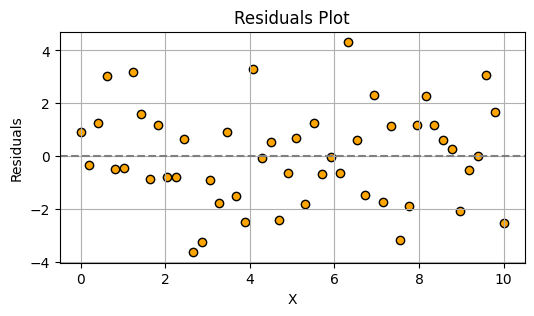

In [44]:
# Flatten y_pred to match shape
y_pred_flat = y_pred.flatten()

# Calculate residuals
residuals = y - y_pred_flat  # both are (50,)

# Plot
plt.figure(figsize=(6, 3))
plt.scatter(X, residuals, color="orange", edgecolors="k")  # use edgecolors (plural)
plt.axhline(y=0, color="gray", linestyle="--")
plt.title("Residuals Plot")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

## 🎯 Residuals Plot

If the residuals are randomly scattered around 0 with no pattern, the model is appropriate. Non-random patterns may indicate issues like non-linearity or heteroscedasticity.

## 📊 Comparison: Custom vs sklearn LinearRegression

| Metric                        | Custom SLR Model       | sklearn LinearRegression |
|------------------------------|------------------------|---------------------------|
| Intercept (θ₀)               | ≈ 5.85                 | ≈ 5.86                    |
| Slope (θ₁)                   | ≈ 2.52                 | ≈ 2.52                    |
| Mean Absolute Error (MAE)    | ≈ 1.42                 | ≈ 1.42                    |
| Mean Squared Error (MSE)     | ≈ 3.06                 | ≈ 3.06                    |
| Root Mean Squared Error      | ≈ 1.75                 | ≈ 1.75                    |
| R-squared (R²)               | ≈ 0.98                 | ≈ 0.98                    |



> 🔎 Note: Values may vary slightly depending on random noise in data.

🧠 Interpretation
- Both models give nearly identical results, confirming the correctness of your custom implementation.
- The sklearn model is optimized for speed and stability, but understanding the math behind the custom implementation is crucial for interviews, intuition, and research.